# kaggle dataset listing the annual cause of death numbers for multiple countries worldwide
[Link to dataset](https://www.kaggle.com/datasets/willianoliveiragibin/annual-cause-death-numbers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset 
data = pd.read_csv('Annual cause death numbers new.csv')

In [2]:
def create_profile(dataset,disease_list):
    dict = {}
    for disease in disease_list:
        dict[dataset[disease].sum()] = disease
    dict_keys = list(dict.keys())
    dict_keys.sort(reverse=True)
    diseases_sorted = []
    for key in dict_keys:
        #print(f"{world_dict[key]}: {key}")
        diseases_sorted.append(dict[key])
    return diseases_sorted, dict_keys 

def get_bars_red(diseases_sorted, top_5, barplot_obj):
    bars_top_5 = []
    for top in top_5:
            for idx in range(len(diseases_sorted)):
                if top == diseases_sorted[idx]:
                    bars_top_5.append(idx)
            for bar in bars_top_5:
                barplot_obj.patches[bar].set_facecolor('red')
    return barplot_obj

def create_barplot(numbers, diseases_sorted, top_5, multiple=False):
    if multiple == False:
        sum_disease_df = pd.DataFrame({'numbers':numbers,'diseases':diseases_sorted})
        plt.figure(figsize=(16,10))
        barplot_obj = sns.barplot(data = sum_disease_df, y='diseases', x='numbers')
        barplot_obj = get_bars_red(diseases_sorted, top_5, barplot_obj)
        plt.xlabel("number of deaths")
        return barplot_obj
    else:
        sum_disease_df = []
        fig, axs = plt.subplots(2,2,figsize=(16,10))
        for numbers_income, diseases_income in zip(numbers, diseases_sorted):
            sum_disease_df.append(pd.DataFrame({'numbers':numbers_income,'diseases':diseases_income}))
        barplot_obj_1 = sns.barplot(data = sum_disease_df[0], y='diseases', x='numbers', ax = axs[0,0])
        barplot_obj_1 = get_bars_red(diseases_sorted[0], top_5, barplot_obj_1)
        barplot_obj_2 = sns.barplot(data = sum_disease_df[1], y='diseases', x='numbers', ax = axs[0,1])
        barplot_obj_2 = get_bars_red(diseases_sorted[1], top_5, barplot_obj_2)
        barplot_obj_3 = sns.barplot(data = sum_disease_df[2], y='diseases', x='numbers', ax = axs[1,0])
        barplot_obj_3 = get_bars_red(diseases_sorted[2], top_5, barplot_obj_3)
        barplot_obj_4 = sns.barplot(data = sum_disease_df[3], y='diseases', x='numbers', ax = axs[1,1])
        barplot_obj_4 = get_bars_red(diseases_sorted[3], top_5, barplot_obj_4)
        return barplot_obj_1, barplot_obj_2, barplot_obj_3, barplot_obj_4 
        
def calculate_percentage(numbers, disease_sorted, top_5):
    total = sum(numbers)
    for top in top_5:
        for idx in range(len(disease_sorted)):
            if disease_sorted[idx] == top:
                print(f"{top}: {round((numbers[idx]/total)*100,2)}%")

### 1. Preprocess dataset

In [3]:
data_cols = list(data.columns)
strip_cols = [col.strip() for col in data_cols if col.endswith('\n\n\n\n\n\n')]
strip_cols = ['Entity', 'Code', 'Year'] + strip_cols + ['Acute hepatitis fatalities', 'Measles fatalities']
data.columns = strip_cols

# set global seaborn color palette
custom_color = sns.color_palette("colorblind",32)
sns.set_palette(custom_color)

#create list of diseases
to_remove = ['Entity', 'Code', 'Year']
disease_list = strip_cols
for remove in to_remove:
    disease_list.remove(remove)

### 2. Create subset for world and calculate the sum of deaths over all years for each fatality

In [4]:
data_world = data[data['Entity'] == 'World']
diseases_sorted_world, numbers_world = create_profile(data_world, disease_list)

get the top five fatality causes to compare between countries

In [5]:
#get top five causes worldwide
top_5_diseases = diseases_sorted_world[:5]

### 3. Display the summed worldwide fatalities of each category - from 1990 to 2020

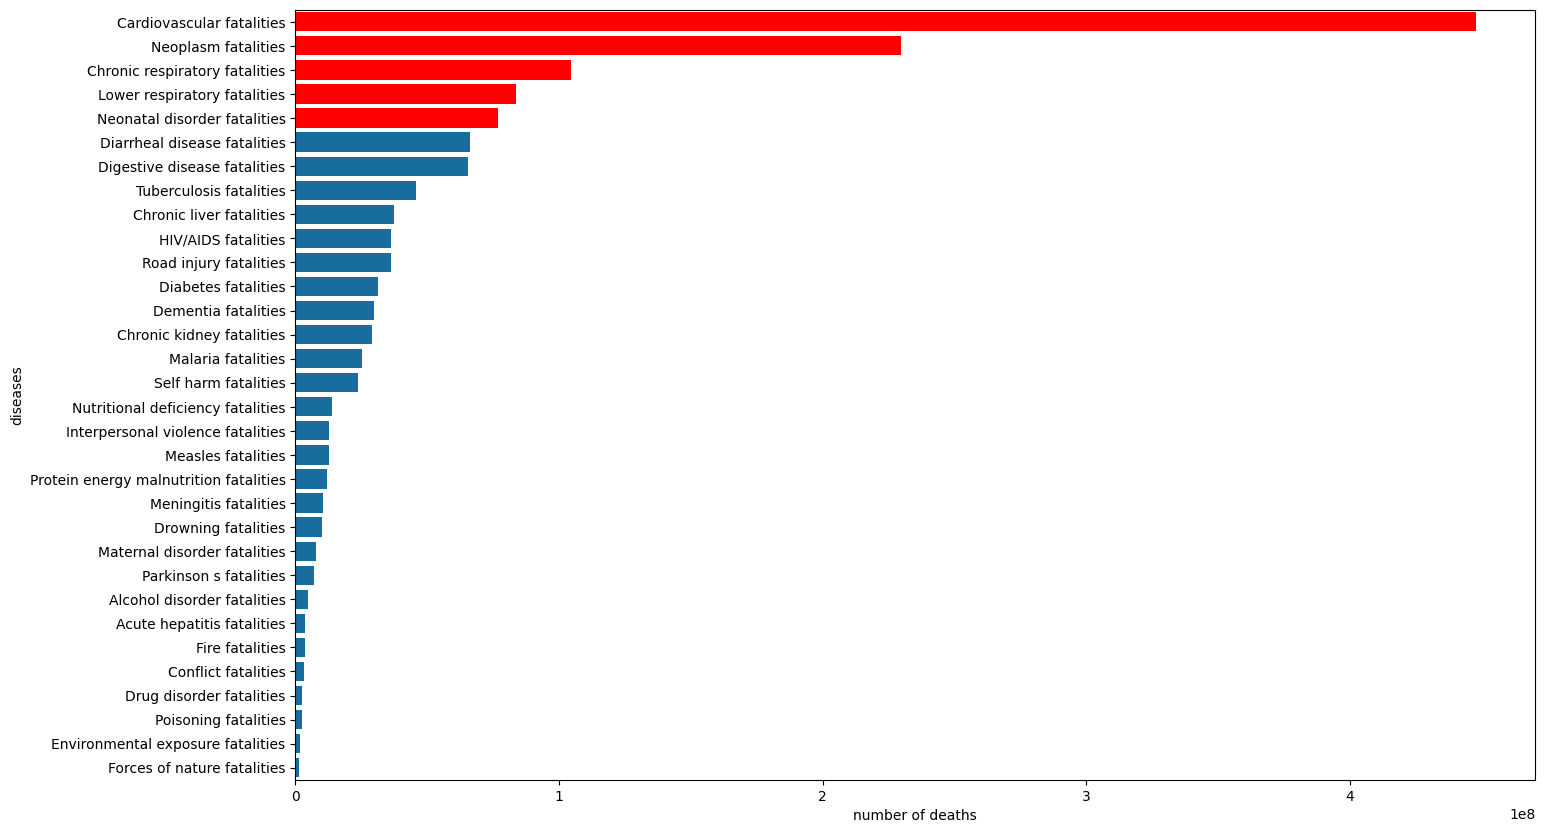

In [6]:
barplot_world = create_barplot(numbers_world, diseases_sorted_world, top_5_diseases)
plt.show()

#### Proportion of all causes for top 5:

In [7]:
calculate_percentage(numbers_world, diseases_sorted_world, top_5_diseases)

Cardiovascular fatalities: 30.23%
Neoplasm fatalities: 15.51%
Chronic respiratory fatalities: 7.06%
Lower respiratory fatalities: 5.66%
Neonatal disorder fatalities: 5.19%


## **First key points:**
## -> Cancer, respiratory and cardiovascular diseases are the top 4 causes of death worldwide. Neonatal fatalities are on fifth place.
## -> However, it is unclear to what extent the data is biased. Perhaps countries with better data collection are over-represented. 

### 4. Plot worldwide fatalities over time - annually from 1990 to 2020

<Figure size 640x480 with 0 Axes>

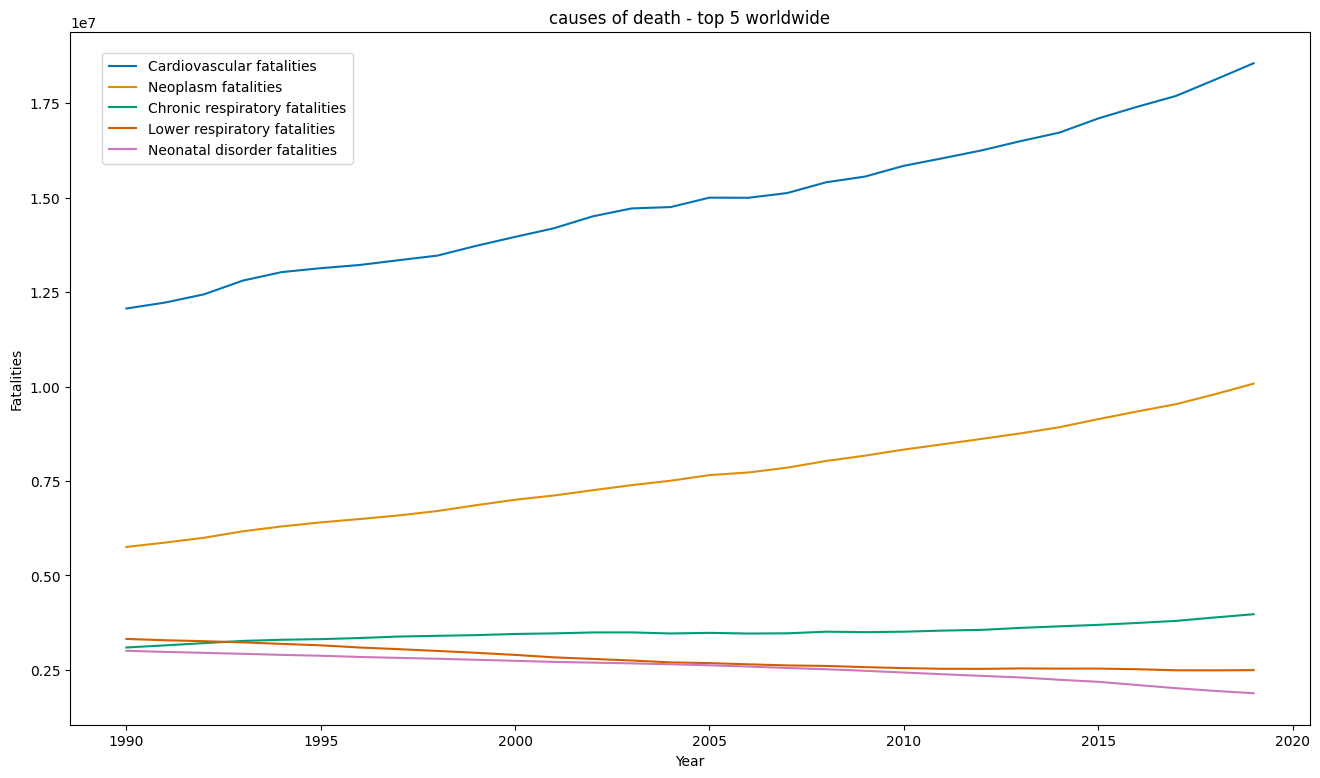

In [8]:
plt.clf()
plt.figure(figsize=(16,9))
line_list_world = []
for disease in top_5_diseases:
    line_list_world.append(sns.lineplot(data=data_world, x='Year',y=disease, label=disease))

plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderpad=0.5)
plt.ylabel('Fatalities')
plt.title("causes of death - top 5 worldwide")
plt.show()

## **Second key points:**
## -> Respiratory and neonatal fatality rates remain constant
## -> Cardiovascular and neoplasm fatality rates increase over time 

# Question: 
## -> Does the fatality distribution vary across countries with different income levels?
##### - The World Bank Group assigns the world's economies to four income groups – low, lower-middle, upper-middle, and high. 
##### - The classifications are updated each year on July 1, based on the Gross National Income (GNI) per capita of the previous calendar year.

In [9]:
data_high = data[data['Entity'] == 'World Bank High Income']
data_upper_middle = data[data['Entity'] == 'World Bank Upper Middle Income']
data_lower_middle = data[data['Entity'] == 'World Bank Lower Middle Income']
data_low = data[data['Entity'] == 'World Bank Low Income']
diseases_sorted_income = []
numbers_income = []

In [10]:
diseases_sorted, numbers = create_profile(data_high, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
diseases_sorted, numbers = create_profile(data_upper_middle, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
diseases_sorted, numbers = create_profile(data_lower_middle, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
diseases_sorted, numbers= create_profile(data_low, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
plt.clf()

<Figure size 640x480 with 0 Axes>

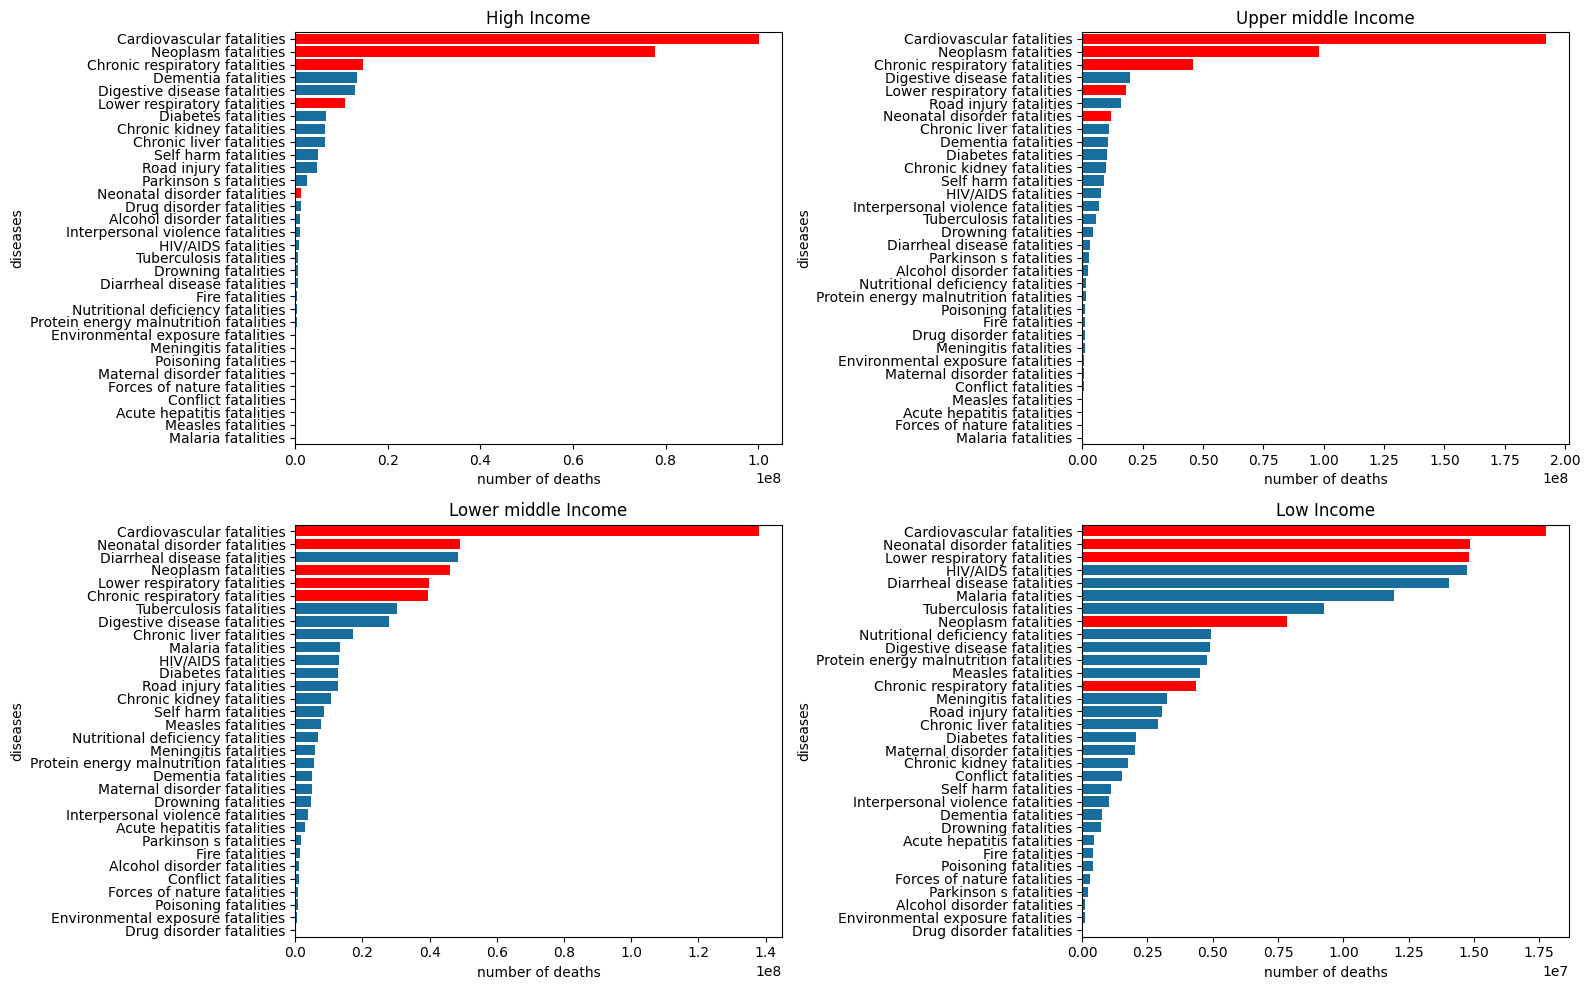

In [151]:
barplots_income = create_barplot(numbers_income, diseases_sorted_income, top_5_diseases, multiple=True)
barplots_income[0].set_title("High Income")
barplots_income[1].set_title("Upper middle Income")
barplots_income[2].set_title("Lower middle Income")
barplots_income[3].set_title("Low Income")
for idx in range(len(barplots_income)):
    barplots_income[idx].set_xlabel("number of deaths")
plt.tight_layout()
plt.show()

## Answer:
## Yes, while Cardiovascular diseases are the dominant cause for fatalities across all levels of income, the neonatal fatalities are strongly varying. 
#### Notice, that neonatal fatalities are the second most common causes of death in lower middle and low income countries. 

# Follow-up question:
## How did the neonatal disorder fatality change over time from 1990 to 2020 across the different levels of GNI? 

In [ ]:
data_high_neonatal = data_high['Neonatal disorder fatalities']
data_upper_neonatal = data_upper_middle['Neonatal disorder fatalities']
data_lower_neonatal = data_lower_middle['Neonatal disorder fatalities']
data_low_neonatal = data_low['Neonatal disorder fatalities']
data_income = []

In [68]:
data_ger = data[data['Entity'] == 'Germany']

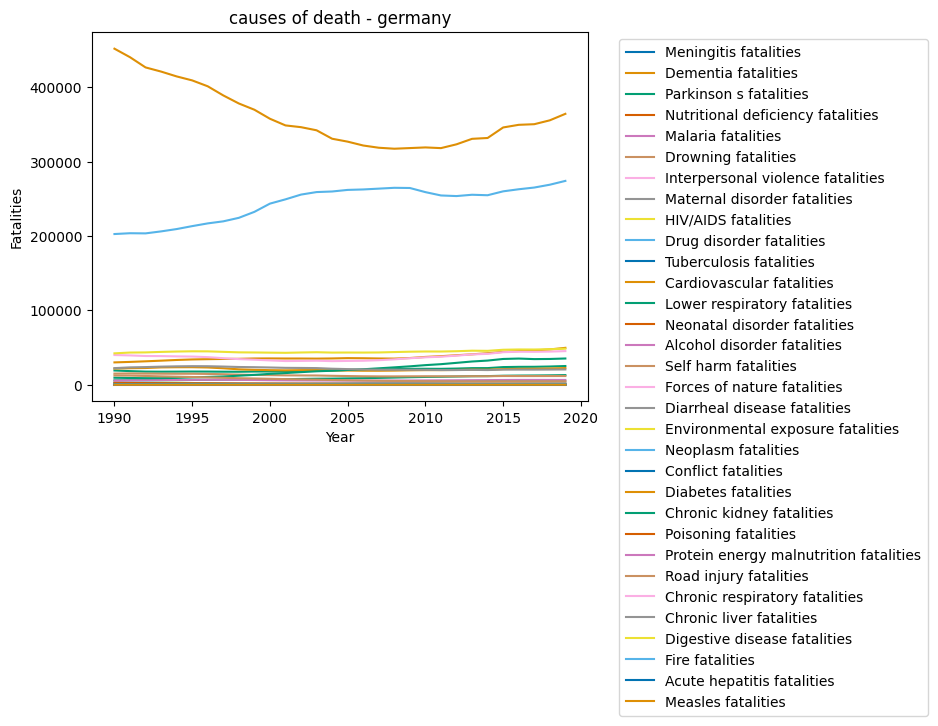

In [58]:
for disease in disease_list:
    line_list_plot.append(sns.lineplot(data=data_ger, x='Year',y=disease, label=disease))

plt.legend(bbox_to_anchor=(1.7, 1), loc='upper right', borderpad=0.5)
plt.ylabel('Fatalities')
plt.title("causes of death - germany")
plt.show()

<Figure size 640x480 with 0 Axes>

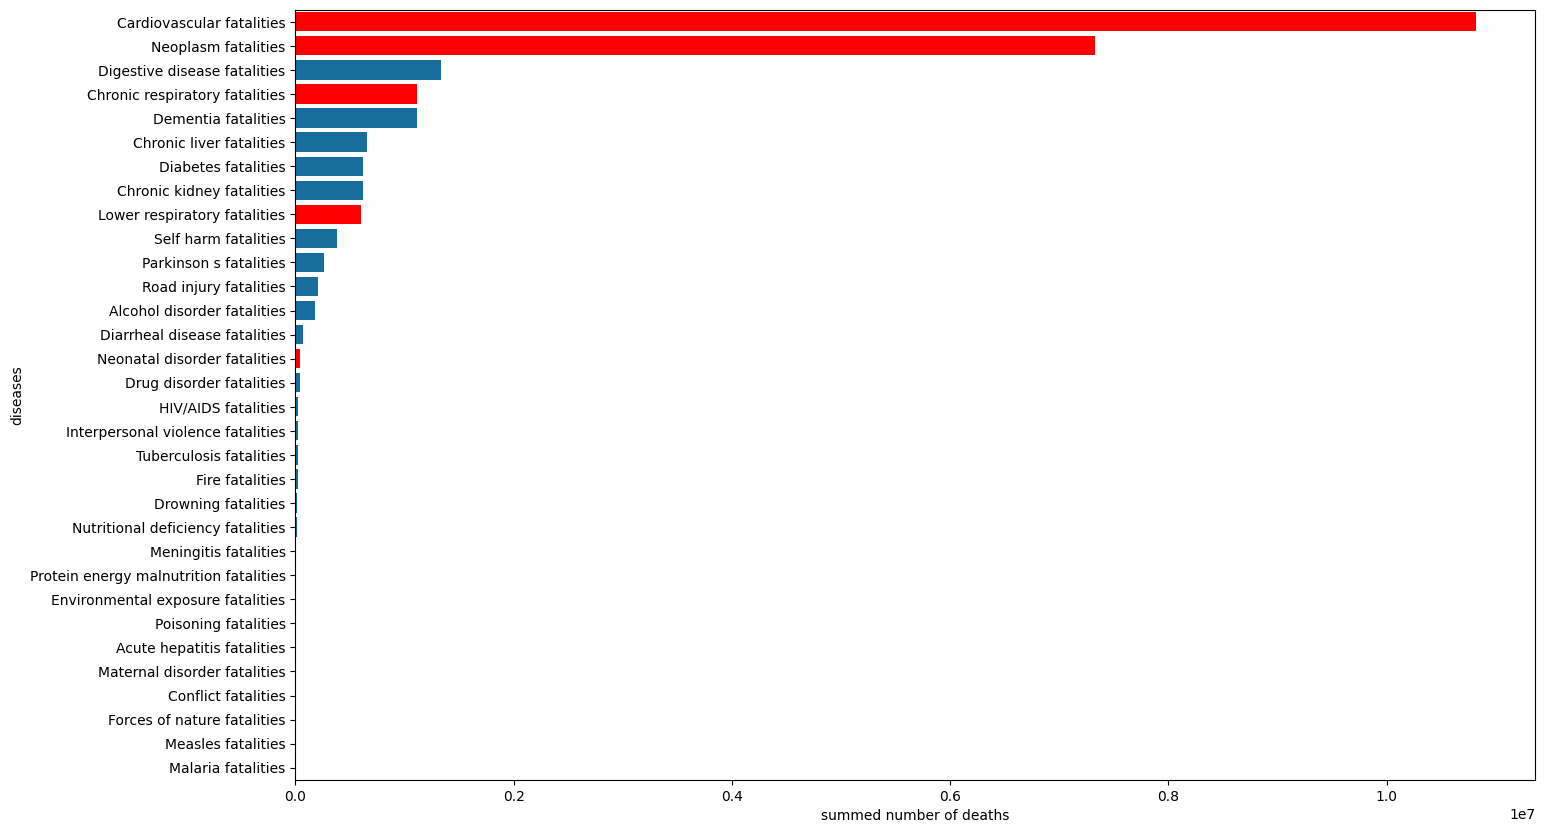

In [57]:
plt.clf()
line_list_plot = []
ger_diseases_sorted, numbers_ger = create_profile(data_ger, disease_list)
barplot_ger = create_barplot(numbers_ger, ger_diseases_sorted, top_5_diseases)
plt.show()

**Cardiovascular fatalities** and **Neoplasm fatalities** are the predominant causes of death in germany. Third place are **digestive disease fatalities**

#### Create dataset containing western countries

In [59]:
western_countries = data[data['Entity'] == 'England']
country_list = ['Austria','Andorra','Australia','Bulgaria','Canada','Croatia','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Latvia','Lithuania','Luxembourg','Monaco','Montenegro','Netherlands','New Zealand','Northern Ireland','Norway','Poland','Portugal','Scotland','Slovakia','Slovenia','Spain','Sweden','Switzerland']
for country in country_list:
    western_countries = pd.concat([western_countries, data[data['Entity'] == country]])
western_countries.reset_index(drop=True, inplace=True)

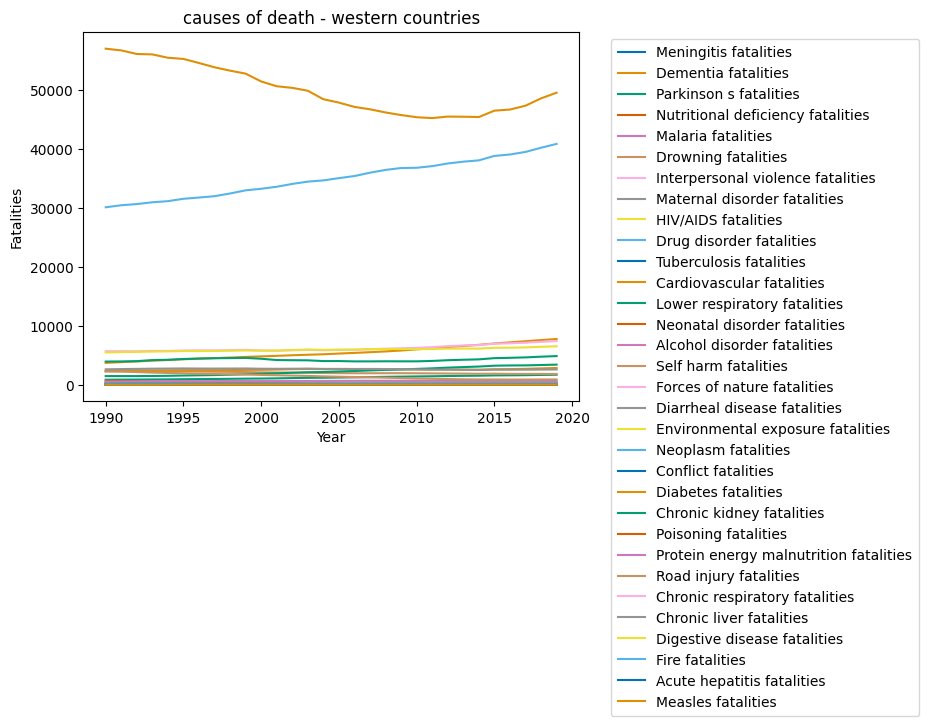

In [60]:
plt.clf()
line_list_disease = []
for disease in disease_list:
    line_list_disease.append(sns.lineplot(data=western_countries, x='Year',y=disease, label=disease, errorbar=None))
plt.legend(bbox_to_anchor=(1.7, 1), loc='upper right', borderpad=0.5)
plt.ylabel('Fatalities')
plt.title("causes of death - western countries")
plt.show()

<Figure size 640x480 with 0 Axes>

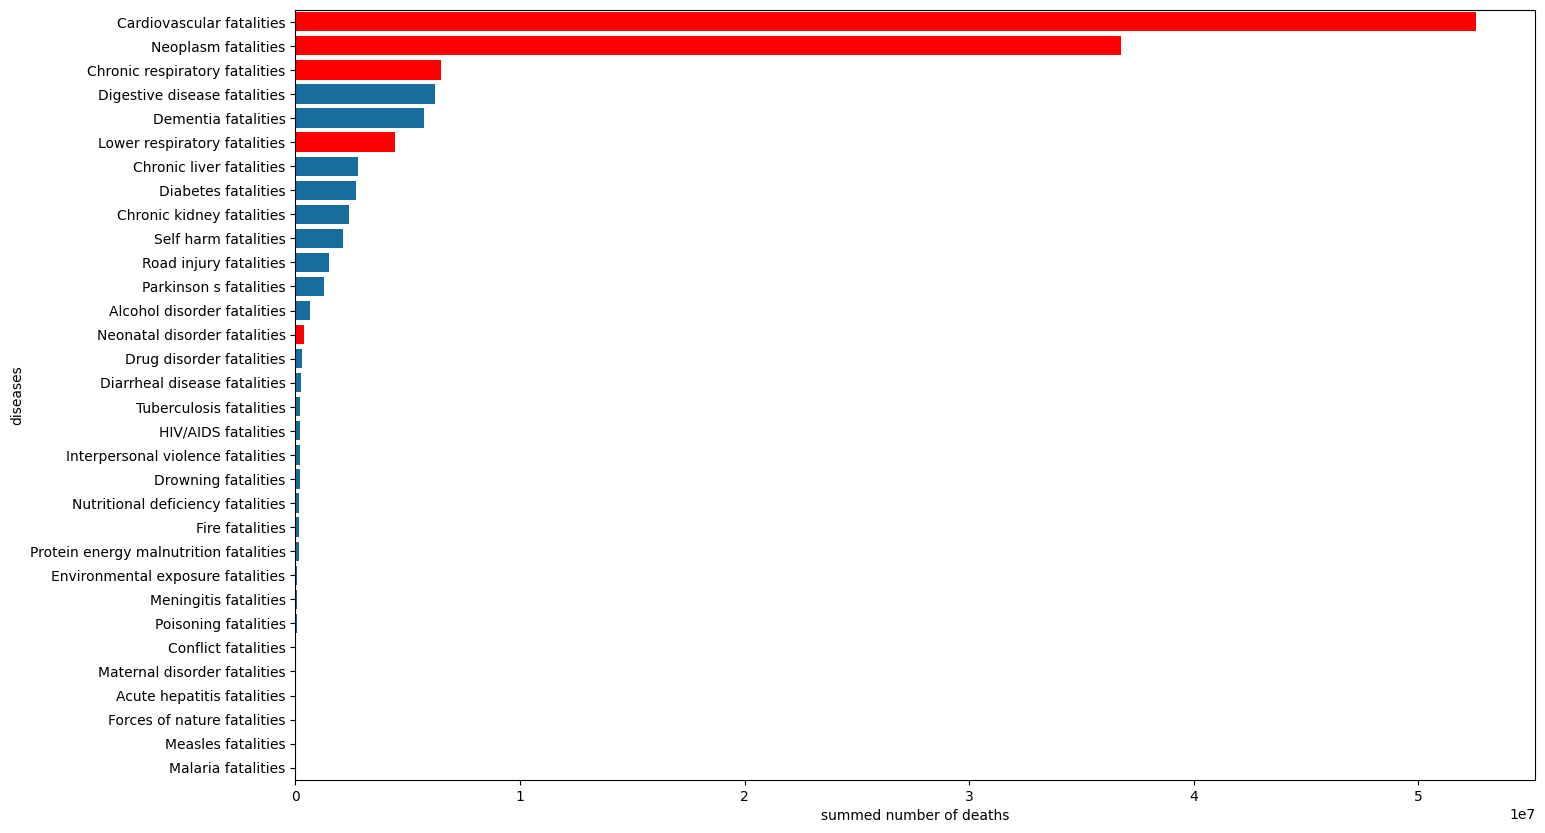

In [62]:
plt.clf()
west_diseases_sorted, numbers_west = create_profile(western_countries, disease_list)
barplot_ger = create_barplot(numbers_west, west_diseases_sorted, top_5_diseases)
plt.show()